In [321]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [322]:
#1.Data pre-processing - Understand the data and treat missing values (Use box plot), outliers 
vehicle_df=pd.read_csv('vehicle.csv')
vehicle_df.head(20)


compactness  circularity  distance_circularity  radius_ratio  \
0            95         48.0                  83.0         178.0   
1            91         41.0                  84.0         141.0   
2           104         50.0                 106.0         209.0   
3            93         41.0                  82.0         159.0   
4            85         44.0                  70.0         205.0   
5           107          NaN                 106.0         172.0   
6            97         43.0                  73.0         173.0   
7            90         43.0                  66.0         157.0   
8            86         34.0                  62.0         140.0   
9            93         44.0                  98.0           NaN   
10           86         36.0                  70.0         143.0   
11           90         34.0                  66.0         136.0   
12           88         46.0                  74.0         171.0   
13           89         42.0                  85.0         144.0   
14           94         49.0                  79.0         203.0   
15           96         55.0                 103.0         201.0   
16           89         36.0                  51.0         109.0   
17           99         41.0                  77.0         197.0   
18          104         54.0                 100.0         186.0   
19          101         56.0                 100.0         215.0   

    pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                   72.0                       10          162.0   
1                   57.0                        9          149.0   
2                   66.0                       10          207.0   
3                   63.0                        9          144.0   
4                  103.0                       52          149.0   
5                   50.0                        6          255.0   
6                   65.0                        6          153.0   
7                   65.0                        9          137.0   
8                   61.0                        7          122.0   
9                   62.0                       11          183.0   
10                  61.0                        9          133.0   
11                  55.0                        6          123.0   
12                  68.0                        6          152.0   
13                  58.0                       10          152.0   
14                  71.0                        5          174.0   
15                  65.0                        9          204.0   
16                  52.0                        6          118.0   
17                  69.0                        6          177.0   
18                  61.0                       10          216.0   
19                   NaN                       10          208.0   

    elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0            42.0                    20.0                        159   
1            45.0                    19.0                        143   
2            32.0                    23.0                        158   
3            46.0                    19.0                        143   
4            45.0                    19.0                        144   
5            26.0                    28.0                        169   
6            42.0                    19.0                        143   
7            48.0                    18.0                        146   
8            54.0                    17.0                        127   
9            36.0                    22.0                        146   
10           50.0                    18.0                        130   
11           54.0                    17.0                        118   
12           43.0                    19.0                        148   
13           44.0                    19.0                        144   
14           37.0                    21.0                        1

In [323]:
print (vehicle_df.shape)

(846, 19)


In [324]:
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

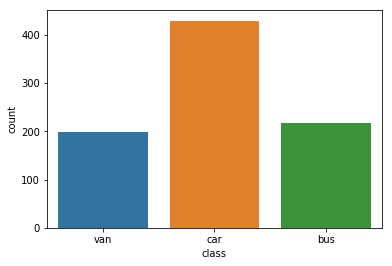

In [325]:
sns.countplot(vehicle_df['class'])

In [326]:
print('since the count attribute has different numbers for each column in dataset, there must be some missing values in it.')
vdes=vehicle_df.describe()
vdes

since the count attribute has different numbers for each column in dataset, there must be some missing values in it.


compactness  circularity  distance_circularity  radius_ratio  \
count   846.000000   841.000000            842.000000    840.000000   
mean     93.678487    44.828775             82.110451    168.888095   
std       8.234474     6.152172             15.778292     33.520198   
min      73.000000    33.000000             40.000000    104.000000   
25%      87.000000    40.000000             70.000000    141.000000   
50%      93.000000    44.000000             80.000000    167.000000   
75%     100.000000    49.000000             98.000000    195.000000   
max     119.000000    59.000000            112.000000    333.000000   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
count            844.000000               846.000000     845.000000   
mean              61.678910                 8.567376     168.901775   
std                7.891463                 4.601217      33.214848   
min               47.000000                 2.000000     112.000000   
25%               57.000000                 7.000000     147.000000   
50%               61.000000                 8.000000     157.000000   
75%               65.000000                10.000000     198.000000   
max              138.000000                55.000000     265.000000   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
count     845.000000              843.000000                 846.000000   
mean       40.933728               20.582444                 147.998818   
std         7.816186                2.592933                  14.515652   
min        26.000000               17.000000                 118.000000   
25%        33.000000               19.000000                 137.000000   
50%        43.000000               20.000000                 146.000000   
75%        46.000000               23.000000                 159.000000   
max        61.000000               29.000000                 188.000000   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
count       843.000000         844.000000                 844.000000   
mean        188.631079         439.494076                 174.709716   
std          31.411004         176.666903                  32.584808   
min         130.000000         184.000000                 109.000000   
25%         167.000000         318.000000                 149.000000   
50%         179.000000         363.500000                 173.500000   
75%         217.000000         587.000000                 198.000000   
max         320.000000        1018.000000                 268.000000   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
count                   842.000000      840.000000        845.000000   
mean                     72.447743        6.364286         12.602367   
std                       7.486190        4.920649          8.936081   
min                      59.000000        0.000000          0.000000   
25%                      67.000000        2.000000          5.000000   
50%                      71.500000        6.000000         11.000000   
75%                      75.000000        9.000000         19.000000   
max                     135.000000       22.000000         41.000000   

       skewness_about.2  hollows_ratio  
count        845.000000     846.000000  
mean         188.919527     195.632388  
std            6.155809       7.438797  
min          176.000000     181.000000  
25%          184.000000     190.250000  
50%          188.000000     197.000000  
75%          193.000000     201.000000  
max          206.000000     211.000000

In [327]:
vehicle_df.isna().sum().sum()

41

In [328]:
vehicle_df.fillna(vehicle_df.median(),inplace=True)
vehicle_df.isna().sum().sum()

0

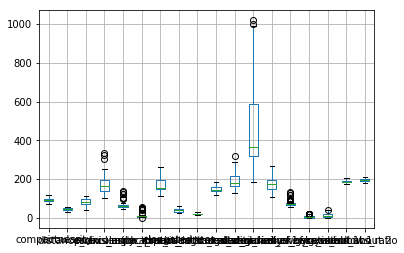

In [329]:
vehicle_df.boxplot()

In [330]:
print ('since there are many outliers in different columns we have to get rid of it.')

since there are many outliers in different columns we have to get rid of it.


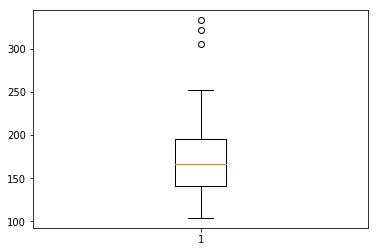

In [331]:
plt.boxplot(vehicle_df['radius_ratio'],0);

In [332]:
#vehicle_df['radius_ratio']=vehicle_df['radius_ratio'].map(lambda x: 250 if x>250 
#     else x)
#first_quantile=vehicle_df['radius_ratio'].describe()['25%']
#third_quantile=vehicle_df['radius_ratio'].describe()['75%']
#iqr=third_quantile-first_quantile
#vehicle_df=vehicle_df[(vehicle_df['radius_ratio']>(first_quantile-2*iqr))&(vehicle_df['radius_ratio']<(third_quantile+2*iqr))]
#any(vehicle_df['radius_ratio']>(third_quantile+2*iqr))

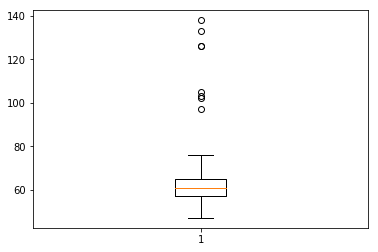

In [333]:
plt.boxplot(vehicle_df['pr.axis_aspect_ratio'],0);

In [334]:
#vehicle_df['pr.axis_aspect_ratio']=vehicle_df['pr.axis_aspect_ratio'].map(lambda x: 77 if x>77 
#     else x)

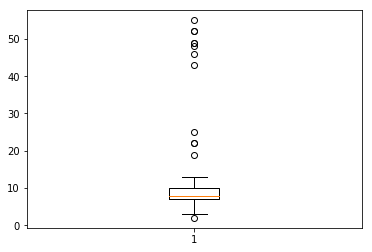

In [335]:
plt.boxplot(vehicle_df['max.length_aspect_ratio'],0);

In [336]:

#vehicle_df['max.length_aspect_ratio']=vehicle_df['max.length_aspect_ratio'].map(lambda x: 14 if x>14 
#     else x)

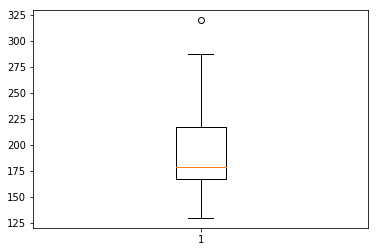

In [337]:
plt.boxplot(vehicle_df['scaled_variance'],0);

In [338]:
#vehicle_df['scaled_variance']=vehicle_df['scaled_variance'].map(lambda x: 290 if x>290 
#     else x)

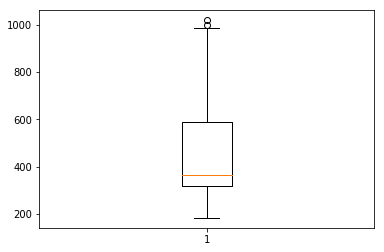

In [339]:
plt.boxplot(vehicle_df['scaled_variance.1'],0);

In [340]:
#vehicle_df['scaled_variance.1']=vehicle_df['scaled_variance.1'].map(lambda x: 1000 if x>1000 
#     else x)

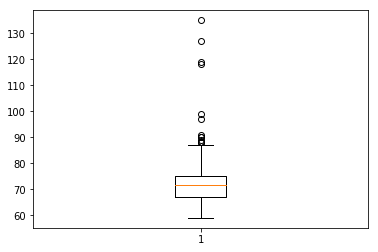

In [341]:
plt.boxplot(vehicle_df['scaled_radius_of_gyration.1'],0);

In [342]:
#vehicle_df['scaled_radius_of_gyration.1']=vehicle_df['scaled_radius_of_gyration.1'].map(lambda x: 87 if x>87 
#     else x)

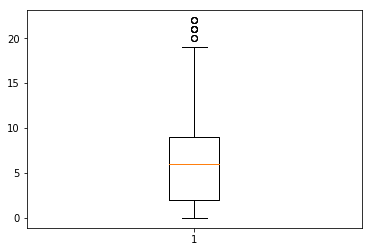

In [343]:
plt.boxplot(vehicle_df['skewness_about'],0);

In [344]:
#vehicle_df['skewness_about']=vehicle_df['skewness_about'].map(lambda x: 19 if x>19 
#     else x)

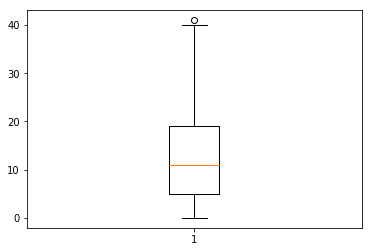

In [345]:
plt.boxplot(vehicle_df['skewness_about.1'],0);

In [346]:
#vehicle_df['skewness_about.1']=vehicle_df['skewness_about.1'].map(lambda x: 40 if x>40 
#     else x)

In [347]:
#Remove outliers using IQR method
outliers=['radius_ratio','pr.axis_aspect_ratio','max.length_aspect_ratio','scaled_variance','scaled_variance.1','scaled_radius_of_gyration.1','skewness_about','skewness_about.1']
for i in range(len(outliers)):
    first_quantile=vdes[outliers[i]]['25%']
    third_quantile=vdes[outliers[i]]['75%']
    iqr=third_quantile-first_quantile
    vehicle_df=vehicle_df[(vehicle_df[outliers[i]]>(first_quantile-3*iqr))&(vehicle_df[outliers[i]]<(third_quantile+3*iqr))]
    

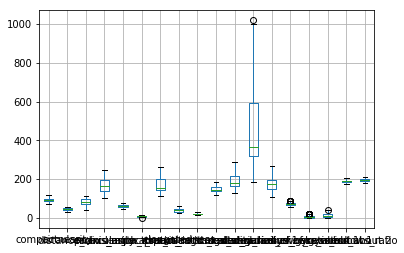

In [348]:
vehicle_df.boxplot()

As you can see almost all the outliers are removed by iqr method.

In [349]:
#2.Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why
vehicle_df.corr()

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.688427              0.789496   
circularity                     0.688427     1.000000              0.793350   
distance_circularity            0.789496     0.793350              1.000000   
radius_ratio                    0.749114     0.649943              0.814834   
pr.axis_aspect_ratio            0.200571     0.207014              0.251539   
max.length_aspect_ratio         0.503035     0.563795              0.673464   
scatter_ratio                   0.812748     0.849590              0.905716   
elongatedness                  -0.788936    -0.822691             -0.911966   
pr.axis_rectangularity          0.813923     0.845305              0.893748   
max.length_rectangularity       0.680672     0.962152              0.775830   
scaled_variance                 0.791586     0.809603              0.883952   
scaled_variance.1               0.814003     0.837876              0.886675   
scaled_radius_of_gyration       0.590476     0.926011              0.708065   
scaled_radius_of_gyration.1    -0.251586     0.054277             -0.248482   
skewness_about                  0.232198     0.144864              0.111146   
skewness_about.1                0.155059    -0.011914              0.264366   
skewness_about.2                0.292562    -0.104689              0.142231   
hollows_ratio                   0.361613     0.047253              0.330464   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.749114              0.200571   
circularity                      0.649943              0.207014   
distance_circularity             0.814834              0.251539   
radius_ratio                     1.000000              0.664536   
pr.axis_aspect_ratio             0.664536              1.000000   
max.length_aspect_ratio          0.475437              0.154984   
scatter_ratio                    0.790928              0.199248   
elongatedness                   -0.846327             -0.303330   
pr.axis_rectangularity           0.764784              0.168482   
max.length_rectangularity        0.588315              0.150898   
scaled_variance                  0.792558              0.212770   
scaled_variance.1                0.775767              0.183495   
scaled_radius_of_gyration        0.559070              0.151599   
scaled_radius_of_gyration.1     -0.408058             -0.333401   
skewness_about                   0.061656             -0.046214   
skewness_about.1                 0.188946             -0.021226   
skewness_about.2                 0.422811              0.408864   
hollows_ratio                    0.508244              0.424567   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.503035       0.812748   
circularity                                 0.563795       0.849590   
distance_circularity                        0.673464       0.905716   
radius_ratio                                0.475437       0.790928   
pr.axis_aspect_ratio                        0.154984       0.199248   
max.length_aspect_ratio                     1.000000       0.494201   
scatter_ratio                               0.494201       1.000000   
elongatedness                              -0.509278      -0.971522   
pr.axis_rectangularity                      0.491185       0.989780   
max.length_rectangularity                   0.647112       0.812237   
scaled_variance                             0.409557       0.978393   
scaled_variance.1                           0.451696       0.993000   
scaled_radius_of_gyration                   0.400148       0.802746   
scaled_radius_of_gyration.1                -0.362445      -0.000836   
skewness_about                              0.110932       0.071551   
skewness_about.1                            0.146340       0.211435   
skewness_about.2                            0.

F:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


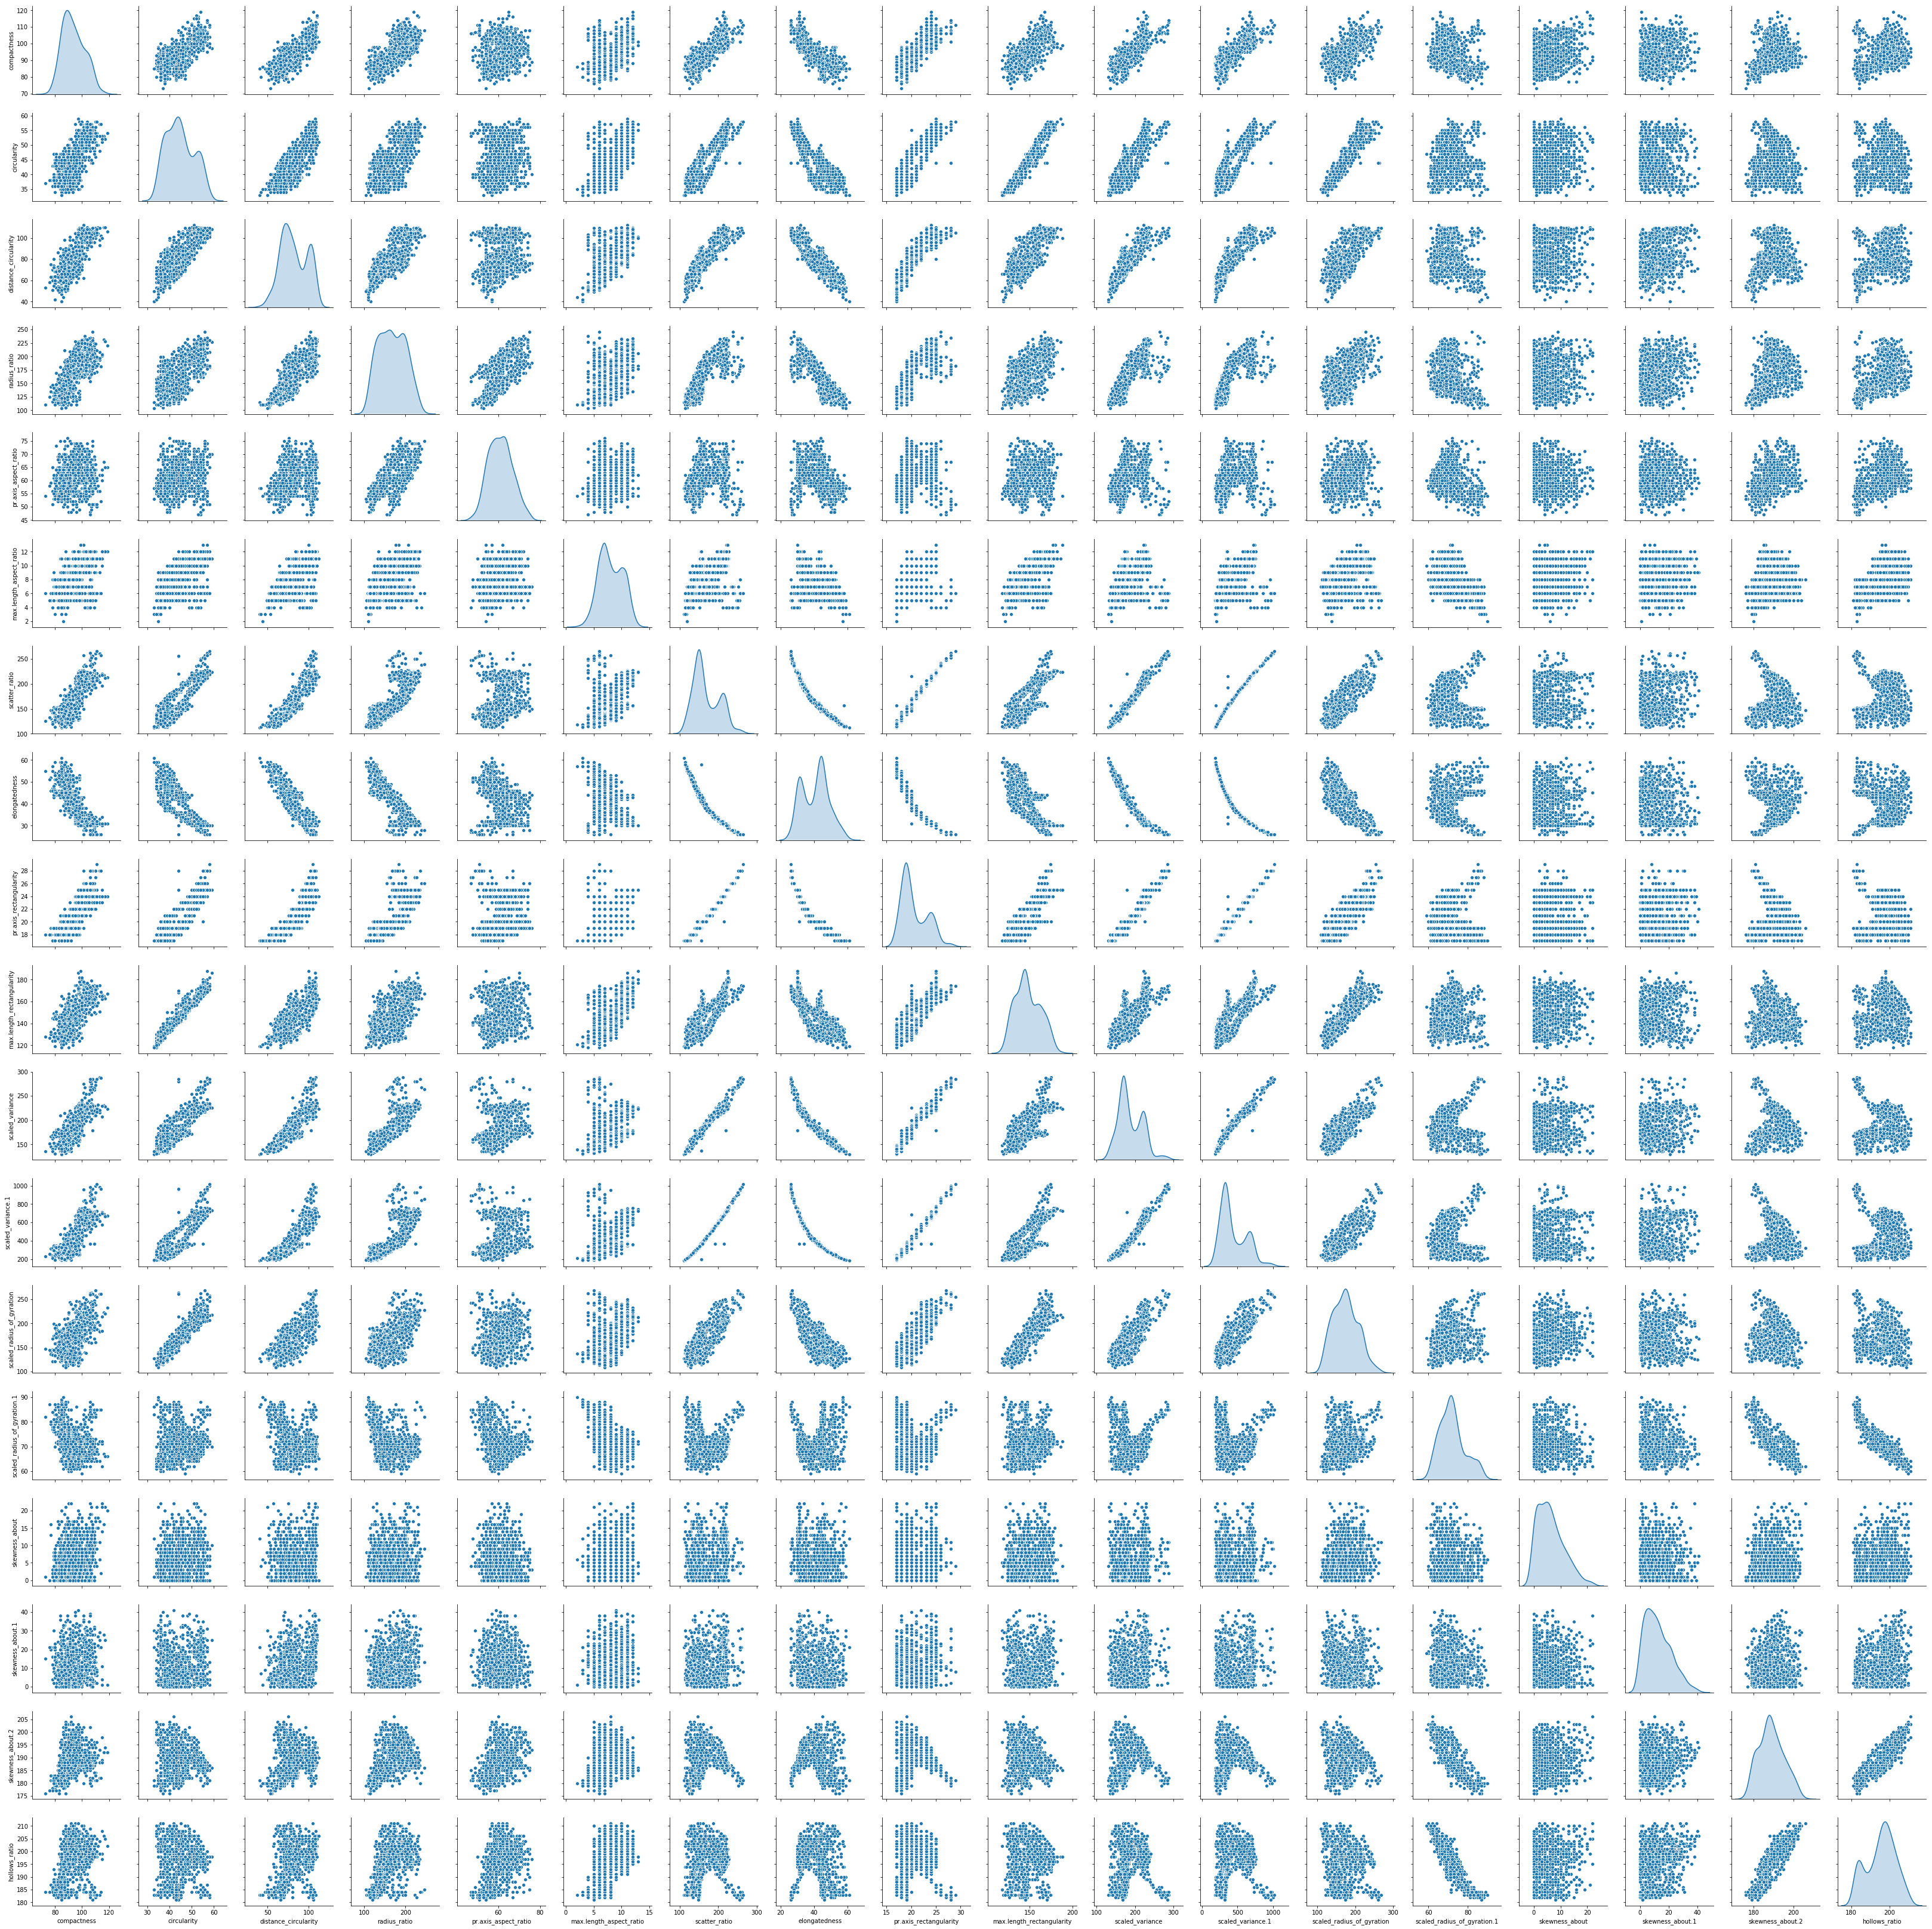

In [350]:
sns.pairplot(vehicle_df,diag_kind='kde')

In [351]:
print ('After considering the pair plot and correlation matrix it is obvious to drop few columns that have very less correlation with each other and keeping only those which have collinearity with each other since PCA helps us to get this covariance information.')


After considering the pair plot and correlation matrix it is obvious to drop few columns that have very less correlation with each other and keeping only those which have collinearity with each other since PCA helps us to get this covariance information.


In [352]:
vehicle_df.drop(['pr.axis_aspect_ratio','scaled_radius_of_gyration.1','skewness_about','skewness_about.1'],axis=1,inplace=True)

In [353]:
#3. Use PCA from scikit learn and elbow plot to find out reduced number of dimension (which covers more than 95% of the variance)


In [354]:
x=vehicle_df.iloc[:,0:-1]
y=vehicle_df.iloc[:,-1]

In [355]:
x.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
5          107         44.0                 106.0         172.0   

   max.length_aspect_ratio  scatter_ratio  elongatedness  \
0                       10          162.0           42.0   
1                        9          149.0           45.0   
2                       10          207.0           32.0   
3                        9          144.0           46.0   
5                        6          255.0           26.0   

   pr.axis_rectangularity  max.length_rectangularity  scaled_variance  \
0                    20.0                        159            176.0   
1                    19.0                        143            170.0   
2                    23.0                        158            223.0   
3                    19.0                        143            160.0   
5                    28.0                        169            280.0   

   scaled_variance.1  scaled_radius_of_gyration  skewness_about.2  \
0              379.0                      184.0             187.0   
1              330.0                      158.0             189.0   
2              635.0                      220.0             188.0   
3              309.0                      127.0             199.0   
5              957.0                      264.0             181.0   

   hollows_ratio  
0            197  
1            199  
2            196  
3            207  
5            183

In [356]:
x.shape

(834, 14)

In [357]:
y.head()

0    van
1    van
2    car
3    van
5    bus
Name: class, dtype: object

In [358]:
from sklearn.model_selection import train_test_split

X_train, X_test_O, y_train, y_test_O = train_test_split(x, y, test_size=0.30, random_state=1)


In [359]:
print(X_train.shape)
print(X_test_O.shape)
print(y_test_O.shape)

(583, 14)
(251, 14)
(251,)


In [360]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std =  sc.fit_transform(X_train)          
train_cov_matrix = np.cov(X_train_std.T)
print('Covariance Matrix \n%s', train_cov_matrix)

Covariance Matrix 
%s [[ 1.00171821  0.6991802   0.78977358  0.7386696   0.48030959  0.8145756
  -0.78829767  0.81684668  0.69306838  0.79422767  0.81755483  0.6030754
   0.27884491  0.33807449]
 [ 0.6991802   1.00171821  0.79204556  0.63901257  0.54302286  0.85977532
  -0.83270923  0.85327874  0.96460799  0.81914281  0.84861774  0.93178448
  -0.10794304  0.02234846]
 [ 0.78977358  0.79204556  1.00171821  0.81331993  0.66484819  0.90482613
  -0.91086329  0.89072675  0.77532234  0.88134543  0.88423024  0.71014587
   0.13818867  0.31408322]
 [ 0.7386696   0.63901257  0.81331993  1.00171821  0.46759232  0.77957107
  -0.8389825   0.75330762  0.58552607  0.78116868  0.76414853  0.55307818
   0.42945652  0.50602096]
 [ 0.48030959  0.54302286  0.66484819  0.46759232  1.00171821  0.47482122
  -0.49086176  0.47013371  0.6339674   0.38709439  0.4310138   0.39093936
   0.08270888  0.40937091]
 [ 0.8145756   0.85977532  0.90482613  0.77957107  0.47482122  1.00171821
  -0.97505596  0.99184697  0.81

In [361]:
eigenvalues, eigenvectors = np.linalg.eig(train_cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-0.27373005  0.14292996 -0.10576167 -0.00823731 -0.83154272  0.38167615
  -0.15844501  0.00240542  0.06290344  0.00891143 -0.16450879 -0.00272195
   0.0046458   0.00324376]
 [-0.29292129 -0.13912402  0.19026887  0.42526865  0.04178322  0.03155622
   0.14044389  0.20888377 -0.0050877   0.0060312  -0.07433506 -0.06316251
  -0.56836468 -0.52827222]
 [-0.30189627  0.08515775  0.08151723 -0.28131063  0.12852492 -0.1514826
  -0.53250708  0.6829094   0.04801777  0.01407266  0.08045527  0.02761371
   0.11422516 -0.06037139]
 [-0.26540041  0.26084459 -0.17385543 -0.04871294  0.43086971  0.75100541
   0.20180658  0.08420219 -0.09810528 -0.00990799  0.11839427  0.01087071
   0.05064695  0.07090147]
 [-0.18820935  0.15206819  0.76800598 -0.38165744 -0.00348863  0.07013545
   0.03460742 -0.33856704  0.20545182  0.01138559  0.1886825   0.02471469
  -0.06733882 -0.04597783]
 [-0.31457494 -0.0627201  -0.14314221 -0.14443343  0.00185212 -0.16856657
   0.12412201 -0.11884835 -0.09540

In [362]:
# Make a set of (eigenvalue, eigenvector) pairs
train_eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
train_eig_pairs.sort()

train_eig_pairs.reverse()
print(train_eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
train_eigvalues_sorted = [train_eig_pairs[index][0] for index in range(len(eigenvalues))]
train_eigvectors_sorted = [train_eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %train_eigvalues_sorted)

[(9.666573759438702, array([-0.27373005, -0.29292129, -0.30189627, -0.26540041, -0.18820935,
       -0.31457494,  0.3110791 , -0.31141079, -0.28372304, -0.30638856,
       -0.31103294, -0.27159459, -0.02327153, -0.06437248])), (2.3235541340007027, array([ 0.14292996, -0.13912402,  0.08515775,  0.26084459,  0.15206819,
       -0.0627201 , -0.01012008, -0.07735731, -0.11330935, -0.05923998,
       -0.07144409, -0.23356765,  0.62002818,  0.62556954])), (0.9017275782387829, array([-0.10576167,  0.19026887,  0.08151723, -0.17385543,  0.76800598,
       -0.14314221,  0.14618906, -0.13489666,  0.32762163, -0.25149183,
       -0.18672711,  0.07445921, -0.18749854,  0.1403541 ])), (0.4285316378673315, array([-0.00823731,  0.42526865, -0.28131063, -0.04871294, -0.38165744,
       -0.14443343,  0.11733204, -0.15368901,  0.37796406, -0.12861354,
       -0.12016503,  0.4858041 ,  0.33476211,  0.10839905])), (0.2846680236358426, array([-0.83154272,  0.04178322,  0.12852492,  0.43086971, -0.00348863,

In [363]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(train_eigvalues_sorted, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp = np.cumsum(var_explained) 

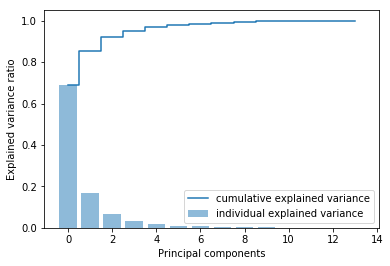

In [364]:
plt.bar(range(14), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(14),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [365]:
from sklearn.decomposition import PCA
X_reduced = PCA(n_components=6)
X_std_4D=X_reduced.fit_transform(X_train_std)

Proj_data_df = pd.DataFrame(X_std_4D)  

In [366]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(Proj_data_df, y_train, test_size=0.3, random_state=1)

F:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


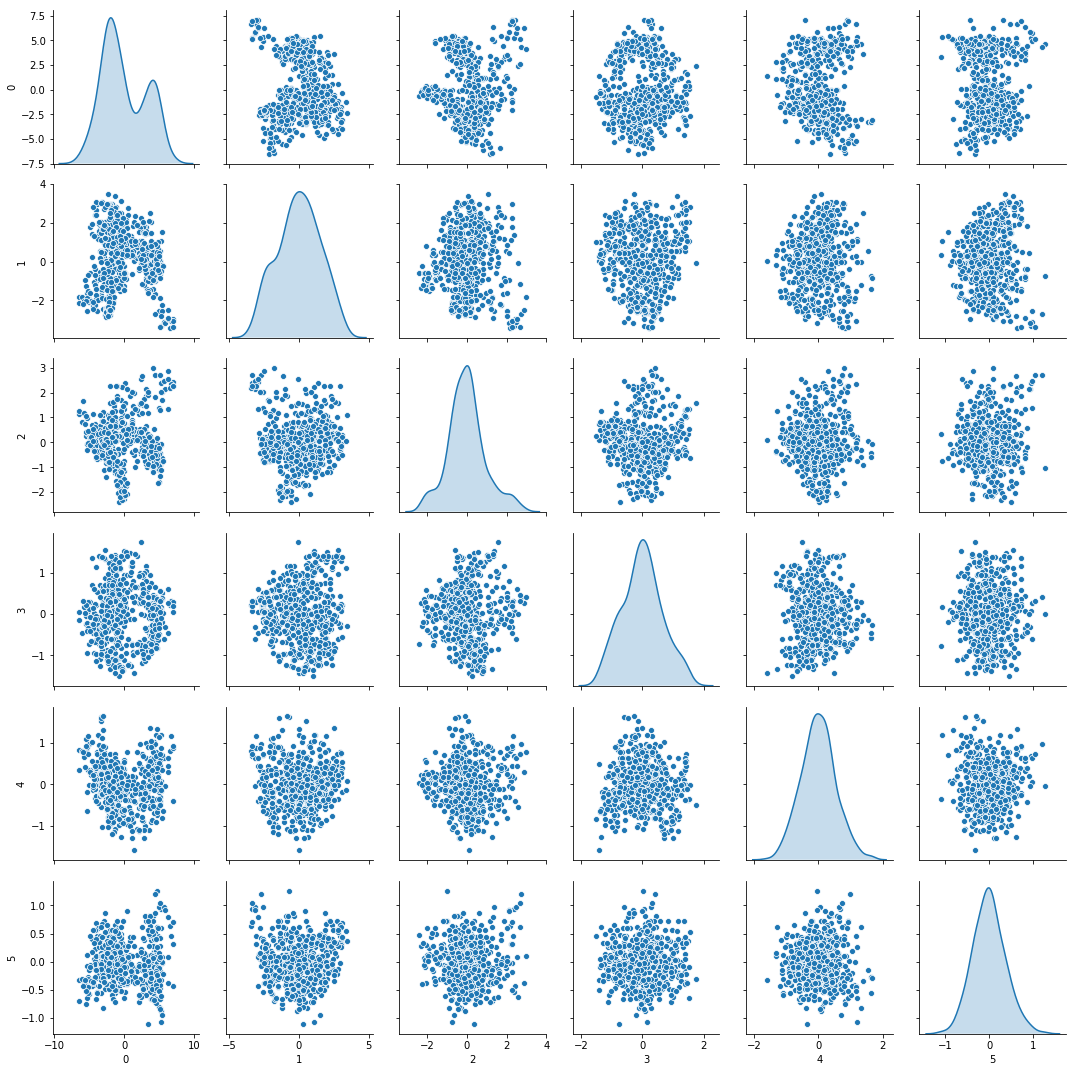

In [367]:
#Let us check it visually
Proj_data_mpg_df = Proj_data_df.join(y)

sns.pairplot(Proj_data_mpg_df, diag_kind='kde') 

So, we have now captured 95% of data as you can see no collinearity between independent variabes. 

In [368]:
#4. Use Support vector machines and use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf) and find out the best hyper parameters and do cross validation to find the accuracy.
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import multiprocessing
param_grid = [    {        
     'kernel': ['linear', 'rbf'],        
     'C': [ 0.1, 0.5, 1.0, 0.05, 0.01]    } ]
gs = GridSearchCV(estimator=SVC(), param_grid=param_grid,scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())

In [369]:
gs.fit(X_train, y_train) #Now train on projected data

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=4,
       param_grid=[{'kernel': ['linear', 'rbf'], 'C': [0.1, 0.5, 1.0, 0.05, 0.01]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [370]:
gs.best_estimator_


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [371]:
gs.score(X_test, y_test)#Testing accuracy on transformed test dataset

0.9485714285714286

In [372]:
y_pred=gs.predict(X_test)
pd.crosstab(y_test, y_pred)

col_0  bus  car  van
class               
bus     48    2    0
car      1   81    1
van      1    4   37

In [373]:

X_test_std =  sc.fit_transform(X_test_O) #Original test datset

X_test_std_4D = X_reduced.fit_transform(X_test_std)   # projecting original data into principal component dimensions

Proj_test_df = pd.DataFrame(X_test_std_4D)  # converting array to dataframe for pairplot


In [374]:
gs.score(Proj_test_df,y_test_O)

0.9083665338645418

In [375]:
y_pred=gs.predict(Proj_test_df)
pd.crosstab(y_test_O, y_pred)

col_0  bus  car  van
class               
bus     49    8    0
car      5  126    4
van      1    5   53